# Dimension reduction: Principal Component Analysis #
Here, we discuss dimension reduction with PCA. First, we show a reduction from two to one dimensions, which can be easily displayed.
Then we use the Iris data set for more dimensions.

In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

## From two to one dimensions ##
We create a sample of data points located around a straight line.
Most variance in the data is along this line. Therefore, when reducing to one dimension, this will be the new axis.

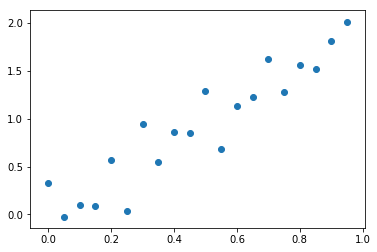

In [59]:
a = np.arange(0,1,0.05)
np.random.seed(1)
b = 2*a + np.random.normal(0,0.2,len(a))
A = np.array([a,b]).T
plt.scatter(A[:,0],A[:,1])
plt.show()

The PCA can be easily called as a class in scikit-learn. We print the principal axis in feature space (the ratio corresponds to the slope of the line) and the mean of the data (which is the anchor point of the line).

In [60]:
pca = PCA(n_components=1)
pca.fit(A)
print(pca.components_)
print(pca.mean_)

[[ 0.41273729  0.91085011]]
[ 0.475       0.92332707]


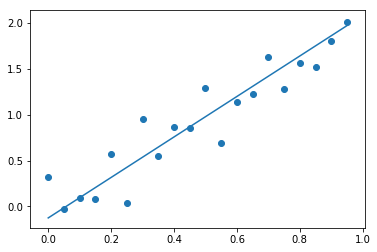

In [61]:
plt.close()
plt.scatter(A[:,0],A[:,1])
plt.plot(a,pca.components_[0][1]/pca.components_[0][0]*(a-pca.mean_[0])+pca.mean_[1])
plt.show()

Transforming the data. The dimensions reduce from 2 to 1. Finally we plot the data. Since its reduced to 1D, all points are lying on one line.

In [62]:
A_r = pca.transform(A)
print(A.shape)
print(A_r.shape)

(20, 2)
(20, 1)


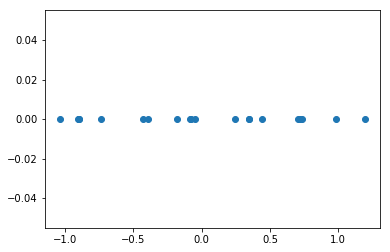

In [63]:
plt.plot(A_r,np.repeat(0,len(A_r)),'o')
plt.show()

We will now transfor the data back. The dimensions are now again increased from 1 to 2. However, due to the PCA, all information in the direction perpendicular to the principal axis is lost.

In [65]:
A_inv = pca.inverse_transform(A_r)
print(A_r.shape)
print(A_inv.shape)

(20, 1)
(20, 2)


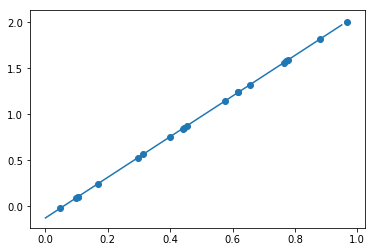

In [66]:
plt.close()
plt.scatter(A_inv[:,0],A_inv[:,1])
plt.plot(a,pca.components_[0][1]/pca.components_[0][0]*(a-pca.mean_[0])+pca.mean_[1])
plt.show()

## More-dimensional example: Iris dataset ##
No we will perform a PCA on the Iris dataset.

In [74]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

First we look again at the scatter plot. We see for example that the histogram in petal width and petal length has a clear gap between one species and two others.

/home/gerold/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


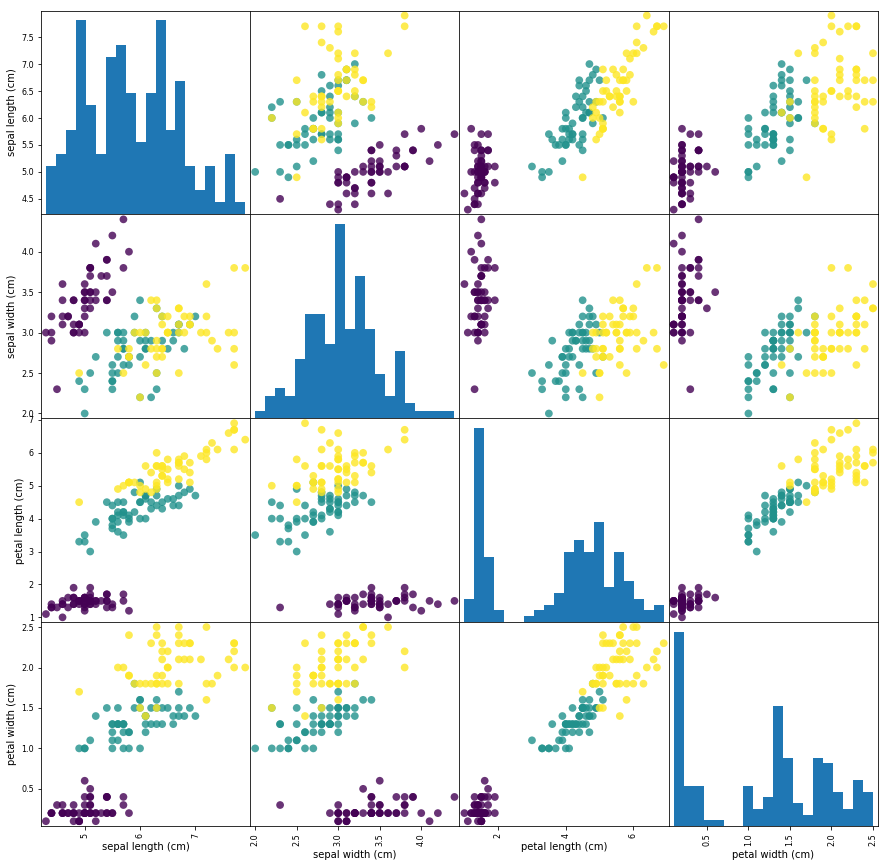

In [75]:
# create dataframe from data in X
# label the columns using the strings in iris.feature_names
iris_dataframe = pd.DataFrame(X, columns=iris.feature_names)
# create a scatter matrix from the dataframe, color by y_train
from pandas import scatter_matrix
scatter_matrix(iris_dataframe, c=y, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

Now we perform the PCA, reducing from 4 to 2 dimensions.

In [86]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [87]:
X_r = pca.transform(X)

We see here, that the first principal axis is a combination of mostly petal length, with some contribution of sepal length and petal width. And the second axis a combination of sepal length and sepal width.

In [88]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

By far most of the variance is in the first component. Only 5% in the second. This leaves only ~2% of variance. This means, it does not make sense to add another component.

In [90]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'% str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.92461621  0.05301557]


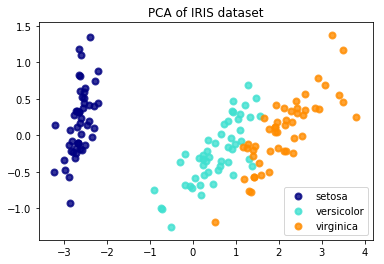

In [91]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()